In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

try:
    import mplhep as hep
    hep.style.use("ATLAS")
except:
    print("mplhep not found. Falling back to default plot style")


In [2]:
# effFile = '../pp2chi0chi0_minimalH_scan/Events/run_03/ddmH_mS_500_m1_244_dm_90_delphes_events_b2tf_effs.csv'
effFile = '../pp2chi0chi0_minimalH_scan/Events/run_06/ddmH_mS_2000_m1_979_dm_90_delphes_events_b2tf_effs.csv'
labels = os.path.basename(effFile).split('_')
mS = float(labels[2])
m1 = float(labels[4])
dm = float(labels[6])
m0 = m1-dm
beta = np.sqrt(1-(2*m1/mS)**2)
data_recast = np.genfromtxt(effFile,skip_header=2,delimiter=',',names=True)

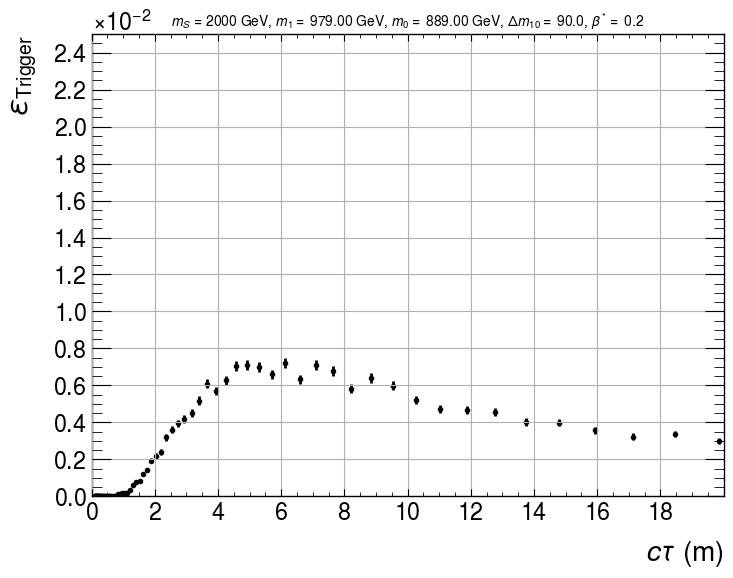

In [3]:
plt.errorbar(data_recast['ctaum'],data_recast['effTrigger'],yerr=data_recast['effErr'],
              fmt="o", color='black', ecolor = "black",linewidth=2,markersize=3)
plt.xlabel(r'$c\tau$ (m)')
plt.ylabel(r'$\epsilon_{\rm Trigger}$')
plt.xlim(0,20.)
plt.ylim(0.,25e-3)
plt.yticks(np.arange(0.,25e-3,2e-3))
plt.xticks(np.arange(0.,20.,2.))
plt.grid()
plt.title(r'$m_S$ = %1.0f GeV, $m_1 = $ %1.2f GeV, $m_0 = $ %1.2f GeV, $\Delta m_{10} = $ %1.1f, $\beta^* = $ %1.1f' %(mS,m1,m0,dm,beta),
          fontsize=10)
plt.show()

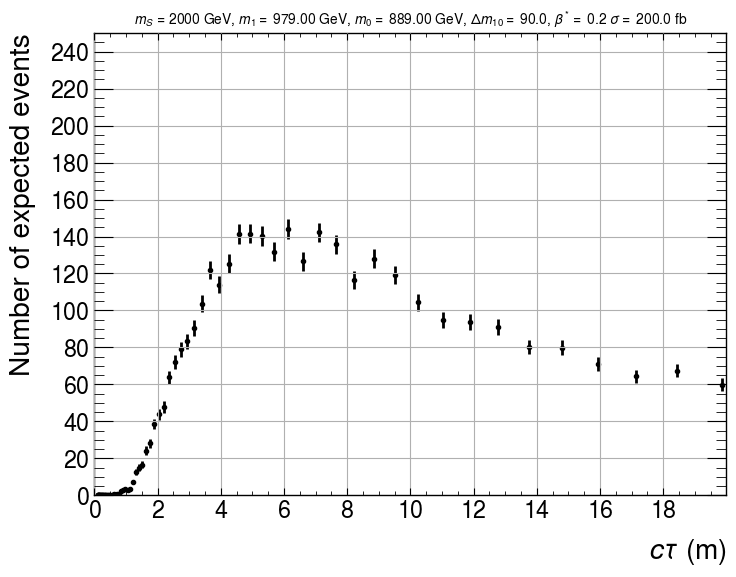

In [5]:
xsec = 200.0;
lumi = 100.0;
plt.errorbar(data_recast['ctaum'],(xsec*lumi)*data_recast['effTrigger'],yerr=(xsec*lumi)*data_recast['effErr'],
              fmt="o", color='black', ecolor = "black",linewidth=2,markersize=3)
plt.xlabel(r'$c\tau$ (m)')
plt.ylabel(r'Number of expected events')
plt.xlim(0,20.)
plt.ylim(0.,250.)
plt.yticks(np.arange(0.,250.,20.))
plt.xticks(np.arange(0.,20.,2.))
plt.grid()
plt.title(r'$m_S$ = %1.0f GeV, $m_1 = $ %1.2f GeV, $m_0 = $ %1.2f GeV, $\Delta m_{10} = $ %1.1f, $\beta^* = $ %1.1f $\sigma = $ %1.1f fb' %(mS,m1,m0,dm,beta,xsec),
          fontsize=10)
plt.show()